In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as ss

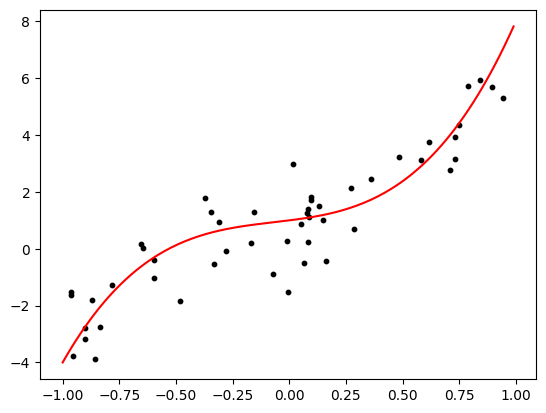

In [68]:
def y(w, x, eps=0.0):
    X = np.stack([np.ones_like(x), x, x**2, x**3], axis=0)
    y = w @ X
    if eps >= 0.0:
        y += eps * np.random.randn(y.shape[0])
    return y

x_data = np.random.uniform(low=-1.0, high=1.0, size=50)
w_true = np.array([1.0, 1.0, 1.0, 5.0])
y_data = y(w_true, x_data, eps=1.0)

xp = np.arange(-1, 1, 0.01)
yp = y(w_true, xp)

fig, ax = plt.subplots()
ax.scatter(x_data, y_data, color='k', s=10)
ax.plot(xp, yp, color='r')
plt.show()

$$ p\left(t \, \middle| \, x, w, \beta \right) = \prod_{n=1}^N \mathcal{N}\left(t_n \, \middle| \, y\left(x_n ,w\right), \beta^{-1}\right) $$

Let's solve this via maximum likelihood estimation.

Here, $ \phi\left(x\right) = \left[ 1, x, x^2, x^3 \right]$.

In [94]:
def phi(x):
    return np.stack([np.ones_like(x), x, x**2, x**3], axis=1)

phi_x = phi(x_data)

In [100]:
w_ml = np.linalg.pinv(phi_x.T @ phi_x) @ phi_x.T @ y_data

In [109]:
w_ml.shape

(4,)

In [110]:
phi_x.shape

(50, 4)

In [118]:
sig_ml = np.sum((y_data - (w_ml @ phi_x.T))**2) / len(y_data)

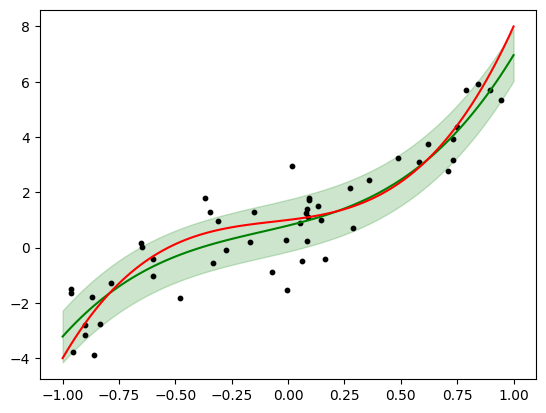

In [122]:
xp = np.linspace(-1, 1, 100)
yp = y(w_ml, xp)
yp_true = y(w_true, xp)

fig, ax = plt.subplots()

ax.fill_between(xp, yp+sig_ml, yp-sig_ml, color='green', alpha=0.2)
ax.plot(xp, yp, color='green')
ax.plot(xp, yp_true, color='red')
ax.scatter(x_data, y_data, color='k', s=10)


For a new input $x$, we want to determine a specific estimate $\hat{y}\left(x\right) \approx t$ for the value of $t$. This will incur a loss, $$ L\left(t, y\left(x\right)\right), $$ but, as usual, we don't really know what $t$ is! 

Thus, we will compute the expected loss over all plausible values for $t$:

$$ \mathbb{E}\left[L\right] = \int_x \int_t L\left(t, y\left(x\right)\right) p\left(x, t\right) \, dt \, dx$$

where the integral over $t$ accounts for the possible/plausible values of $t$ for a given $x$, and the integral over $x$ accounts for all points in the data space. Note that $\hat{y}\left(x\right)$ in the integrand is our particular choice of value for what we assign to $x$; different choices of this assignment will give different losses. Thus, we've written the expected loss as a function of the choice of how to assign values.



If we use the squared-error loss, this is 
$$ \mathbb{E}\left[L\right] = \int_x \int_t \left(y\left(x\right) - t\right)^2 p\left(x,t\right) \, dt\, dx $$

You can use calculus of variations to show that this is minimized when we choose $\hat{y}$ to be the conditional average value, $$ \hat{y}\left(x\right) = \mathbb{E}\left[ t\, \middle| \, x\right].$$

By the definition of our model, this is $\mu\left(x\right) = w^T \left[1, x, x^2 ,x^3 \right]$.